In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns, numpy as np, pandas as pd
from numpy import inf

In [2]:
import os
os.getcwd()
os.chdir('../..')
os.getcwd()

'/home/dcmorgan'

In [3]:
depth=pd.read_csv('assemble/GMOREA0050-DNA/depth.txt',sep='\t',header=None)
# hits=pd.read_csv('assemble/GMOREA0109-DNA/viral_hits.blast',sep='\t',names=['name','tmp','identity','tmp1','tmp2','tmp3','tmp4','tmp5','tmp8','tmp12','tmp13','tmp11'])
# hits=hits[['name','identity']]
label=pd.read_csv('assemble/label.txt',sep='\t')


In [ ]:
data=pd.read_csv('assemble/contig_counts.tsv',sep='\t')
data=data.drop(columns='length').melt(['contig']).replace({'-DNA.idxstats.txt':' '}, regex=True)
data.variable.replace(' ','',regex=True,inplace=True)
label=pd.read_csv('assemble/label.txt',sep='\t')
data=pd.merge(data,label,left_on='variable',right_on='id')


In [184]:
data

,k141_150290,k141_196530,k141_2,k141_23124,k141_121391,k141_57813,k141_144510,k141_167631,k141_63592,k141_184973,...,k141_98762,k141_185688,k141_70201,k141_93003,k141_41012,k141_6188,id,sex,age,label
21,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,GMOREA0041,female,57.0,Refractory
1,18,14,20,16,8,8,10,63,16,8,...,14,51,1191,6,6,57,GMOREA0048,male,47.0,Refractory
2,6,515,25,14,52,41,11,30,14,12,...,129,18,8,165,12,12,GMOREA0050,male,54.0,Refractory
46,12,153,10,6,126,10,14,8,54,12,...,12,8,16,10,18,156,GMOREA0052,male,60.0,Non-refractory
47,80,8,14,18,36,16,22,66,9,102,...,410,14,34,6,42,6,GMOREA0061,male,52.0,Non-refractory
24,18,16,22,18,6,1522,10,10,8,7,...,26,160,111,29,20,24,GMOREA0067,female,47.0,Refractory
25,6,6,68,8,461,14,14,558,34,41,...,11872,9,396,90,24,10,GMOREA0070,female,60.0,Refractory
26,8,14,24,28,670,40,88,9,16,28,...,12,380,19075,30,12,34660,GMOREA0080,female,49.0,Refractory
76,38,32,38,481,8,36,1067,34,10,91,...,8,871,10,12,12,10,GMOREA0094,female,43.0,Non-refractory
3,44,14,16,48,34,1358,1808,4,15,28,...,18,12,978,66,8,63,GMOREA0097,male,42.0,Refractory


(array([11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

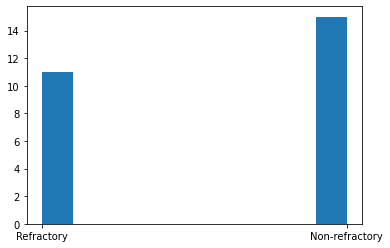

In [186]:
plt.hist(data.label)

In [180]:


data=pd.read_csv('assemble/contig_counts.tsv',sep='\t')
data=data.drop(columns='length').melt(['contig']).replace({'-DNA.idxstats.txt':' '}, regex=True)
data.variable.replace(' ','',regex=True,inplace=True)
label=pd.read_csv('assemble/label.txt',sep='\t')
data=pd.merge(data,label,left_on='variable',right_on='id')
species=pd.read_csv('assemble/dvf_species.txt',sep='\t',names=['contig','species'])
data=pd.merge(data,species,how='left')
data=data.fillna('unknown')
data=data[data.value!=0]

plt.figure(figsize=(8,12))
data['log_abundance']=np.log10(data.value)
data['log_abundance'][np.isneginf(data['log_abundance'])] = 0
data['log_abundance']=data['log_abundance'].fillna(0)
# tmp=sns.violinplot(data=data, y="variable", x="log_abundance",scale="count",hue='sex')
# tmp=sns.boxplot(data=data, y="variable", x="log_abundance",hue='label',dodge=False)
data['genus']=data.species.str.split(' ').str[0]


/tmp/ipykernel_3289/952112909.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['log_abundance'][np.isneginf(data['log_abundance'])] = 0


<Figure size 576x864 with 0 Axes>

In [70]:
data1=data[data.label=='Non-refractory']
sub_gen=data1.groupby('genus').count().sort_values('contig',ascending=False).reset_index().genus[1:20]
data1=data1[data1['genus'].isin(sub_gen)]

data2=data[data.label=='Refractory']
sub_gen=data2.groupby('genus').count().sort_values('contig',ascending=False).reset_index().genus[1:20]
data2=data2[data2['genus'].isin(sub_gen)]

/tmp/ipykernel_3289/562523426.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


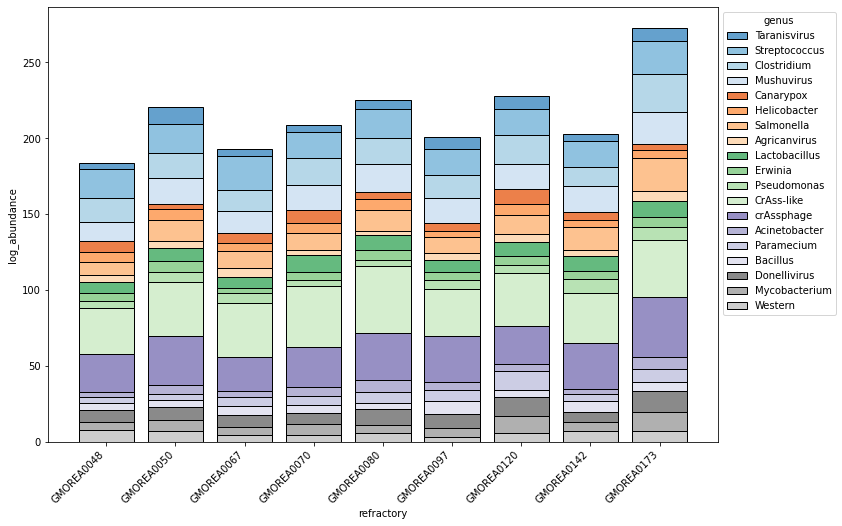

In [71]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data2, x='variable', hue='genus', weights='log_abundance',
             multiple='stack', palette='tab20c', shrink=0.8)
ax.set_ylabel('log_abundance')
ax.set_xlabel('refractory')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Fix the legend so it's not on top of the bars.
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))


In [73]:
import ecopy

In [182]:
data=pd.read_csv('assemble/contig_counts.tsv',sep='\t',index_col=0)
data=data.drop(columns='length')#.replace({'-DNA.idxstats.txt':' '}, regex=True)
data.columns=data.columns.str.replace('-DNA.idxstats.txt','',regex=True)
data=data.T
label=pd.read_csv('assemble/label.txt',sep='\t')
data=pd.merge(data,label,left_index=True,right_on='id')
# data1=data[data.label=='Refractory']
# data1=data1.drop(columns={'id','sex','age','label'})

# data2=data[data.label=='Non-refractory']
# data2=data2.drop(columns={'id','sex','age','label'})


In [149]:
data.index=data.label
data=data.drop(columns={'id','sex','age','label'})

In [167]:
A=ecopy.diversity(data, method='shannon')
# B=ecopy.diversity(data2, method='shannon')
C=ecopy.diversity(data, method='simpson',breakNA=True)
# D=ecopy.diversity(data2, method='simpson',breakNA=True)
A=pd.DataFrame(A)
A.index=data.index
A.rename(columns={0:'Shannon_Index'},inplace=True)

C=pd.DataFrame(C)
C.index=data.index
C.rename(columns={0:'Simpson_Index'},inplace=True)

/home/dcmorgan/.conda/envs/mypy3/lib/python3.9/site-packages/ecopy/diversity/diversity.py:84: RuntimeWarning: invalid value encountered in divide
  z = z / z.sum(axis=1)[:,np.newaxis]
/home/dcmorgan/.conda/envs/mypy3/lib/python3.9/site-packages/ecopy/diversity/diversity.py:98: RuntimeWarning: divide by zero encountered in divide
  div = 1./div


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Refractory v.s. Non-refractory: t-test independent samples with Bonferroni correction, P_val=7.472e-01 stat=3.261e-01


(<Axes: xlabel='label', ylabel='Shannon_Index'>,
 [<statannot.StatResult.StatResult at 0x7f9d7bd5c220>])

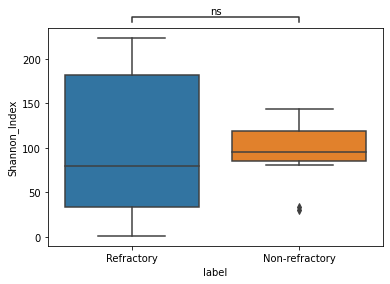

In [169]:
from statannot import add_stat_annotation

ax=sns.boxplot(data=A,y=A.Shannon_Index,x=A.index)
add_stat_annotation(ax, data=A,y=A.Shannon_Index,x=A.index,
                    box_pairs=[("Refractory", "Non-refractory")],# ("Thur", "Sat"), ("Fri", "Sun")],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Refractory v.s. Non-refractory: t-test independent samples with Bonferroni correction, P_val=9.996e-01 stat=4.775e-04


(<Axes: xlabel='label', ylabel='Simpson_Index'>,
 [<statannot.StatResult.StatResult at 0x7f9d7b9c9ac0>])

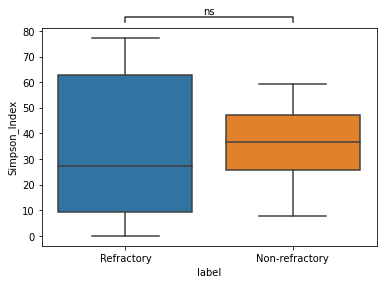

In [175]:
from statannot import add_stat_annotation
C=C.replace(inf,0)
ax=sns.boxplot(data=C,y=C.Simpson_Index,x=C.index)
add_stat_annotation(ax, data=C,y=C.Simpson_Index,x=C.index,
                    box_pairs=[("Refractory", "Non-refractory")],# ("Thur", "Sat"), ("Fri", "Sun")],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)


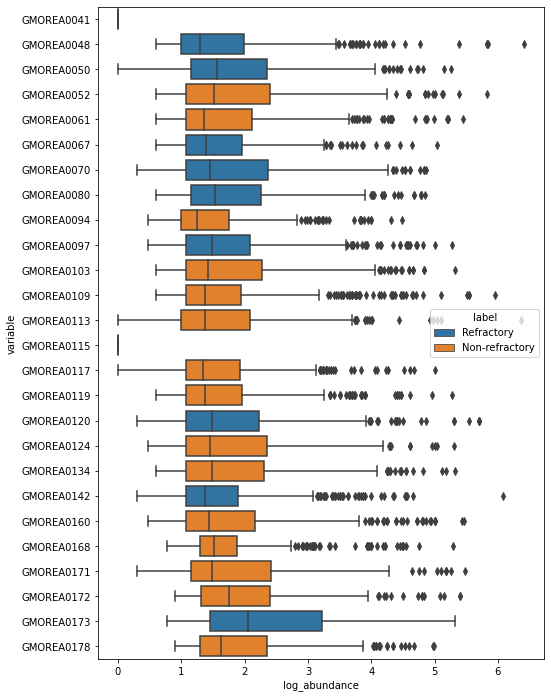

In [290]:
plt.figure(figsize=(8,12))
tmp=sns.boxplot(data=data, y="variable", x="log_abundance",hue='label',dodge=False)

In [292]:
data['over_fifty'] = np.where( data.age > 50, 1, 0)

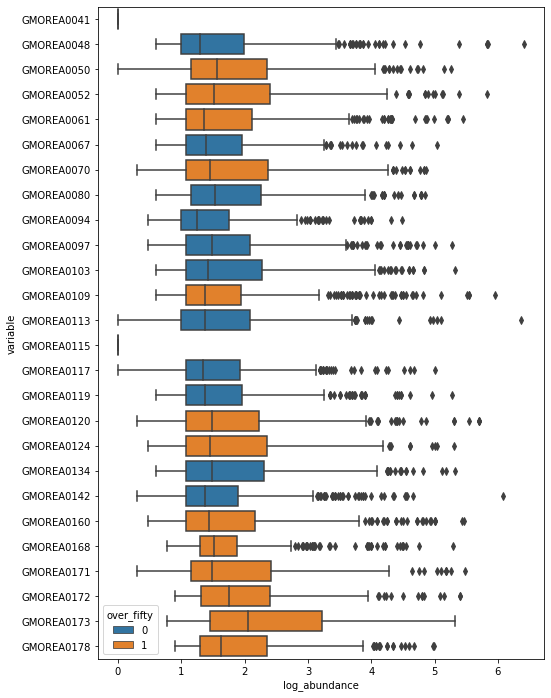

In [293]:
plt.figure(figsize=(8,12))
tmp=sns.boxplot(data=data, y="variable", x="log_abundance",hue='over_fifty',dodge=False)

In [260]:
len(pd.unique(data.id))

26